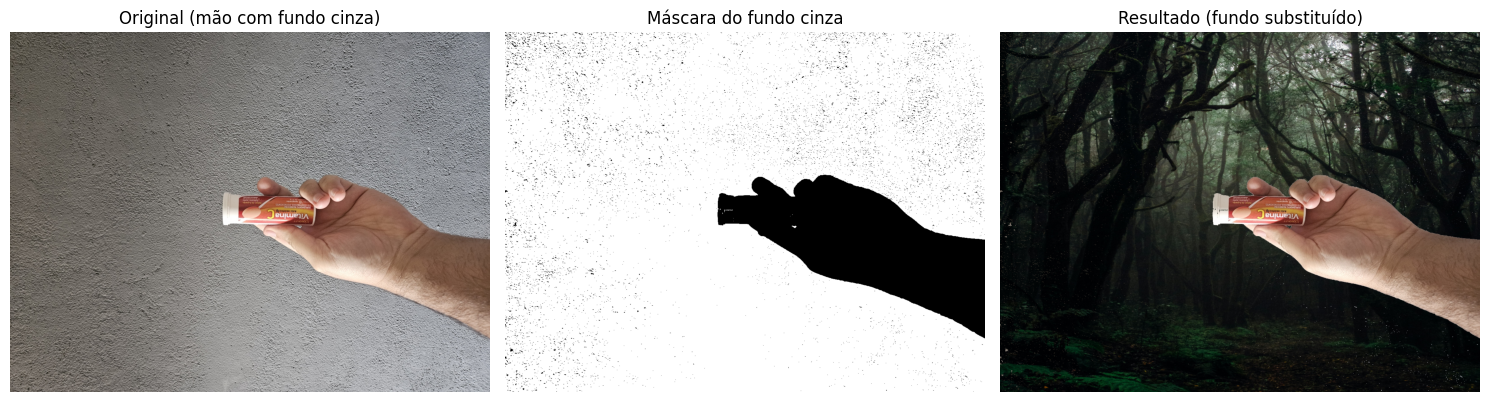

In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ============ 1) Carregar imagens ============
fg = Image.open('imagem/maoComVitamina.jpg').convert('RGB')   # imagem com fundo cinza
bg = Image.open('imagem/pexels-francesco-ungaro.jpg').convert('RGB')   # nova cena de fundo

# Redimensionar o background para o mesmo tamanho do foreground
bg = bg.resize(fg.size, resample=Image.BILINEAR)

# Para NumPy (H, W, 3) e uint8
fg = np.array(fg, dtype=np.uint8)
bg = np.array(bg, dtype=np.uint8)

# ============ 2) Parâmetros do chroma key para CINZA ============
# Regras para detectar tons de cinza (R ≈ G ≈ B)
GRAY_MIN = 50      # valor mínimo para considerar cinza (incluir cinzas mais escuros)
GRAY_MAX = 220      # valor máximo para considerar cinza (incluir cinzas mais claros)
COLOR_DIFF = 17     # diferença máxima entre R, G, B para ser considerado cinza

R = fg[..., 0].astype(np.int16)
G = fg[..., 1].astype(np.int16)
B = fg[..., 2].astype(np.int16)

# Máscara para detectar tons de cinza:
# 1. Valores estão na faixa de cinza (não muito escuro nem muito claro)
# 2. R, G, B são similares entre si (característica do cinza)
mask_range = (R >= GRAY_MIN) & (R <= GRAY_MAX) & (G >= GRAY_MIN) & (G <= GRAY_MAX) & (B >= GRAY_MIN) & (B <= GRAY_MAX)
mask_similarity = (np.abs(R - G) <= COLOR_DIFF) & (np.abs(G - B) <= COLOR_DIFF) & (np.abs(R - B) <= COLOR_DIFF)

# Combinar as duas condições
mask = mask_range & mask_similarity

# ============ 3) Composição ============
out = fg.copy()
out[mask] = bg[mask]

# ============ 4) Visualização ============
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(fg); axs[0].set_title('Original (mão com fundo cinza)'); axs[0].axis('off')
axs[1].imshow(mask, cmap='gray'); axs[1].set_title('Máscara do fundo cinza'); axs[1].axis('off')
axs[2].imshow(out); axs[2].set_title('Resultado (fundo substituído)'); axs[2].axis('off')
plt.tight_layout()
plt.show()
